In [148]:
import cv2
import os
import numpy as np
import pandas as pd

#### SNR

In [3]:
filename = ".venv\workspace2\sequences\list.txt"
with open(filename) as f:
    mylist = f.read().splitlines() 
    d = {'Sequences': mylist}
    mean_psnr = []
    mean_cnr = []
    mean_area = []

    for line in mylist:
        print(line)
        dir = ".venv\\workspace2\\sequences\\" + line.rstrip('\n') + "\\"
        # for filename in os.listdir(dir):
        #     i1 = cv2.imread(dir + "\\" + filename)
        #     cv2.imshow("image", i1)
        #     i1.shape
        lst = os.listdir(dir + "color\\")
        number_files = len(lst)
        psnr_values = []
        noise_values = []
        contrast_values = []
        cnr_values = []
        
        for i in range (number_files - 1):
            #SNR
            img1 = cv2.imread(dir + "color\\" + f'{f"{i + 1}":0>8}' + ".jpg")
            img2 = cv2.imread(dir + "color\\" + f'{f"{i + 2}":0>8}' + ".jpg")
            psnr_values.append(cv2.PSNR(img1, img2))
            noise_values.append(cv2.meanStdDev(img1, img2))
        
            #CNR
            img = cv2.imread(dir + "color\\" + f'{f"{i + 1}":0>8}' + ".jpg")
            y = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)[:,:,0]

            # compute min and max of Y
            min = np.min(y)
            max = np.max(y)

            # compute contrast
            cnr_values.append((max-min)/noise_values[i])

            #Object size
            df = pd.read_csv(dir + "\\" + 'groundtruth.txt', header=None)
            # df.to_csv('csv\\groundtruth.csv')
            # df = pd.read_csv('csv\\groundtruth.csv')
            h = df[2].mean()
            v = df[3].mean()


        mean_area.append(h * v)
        mean_psnr.append(np.mean(psnr_values))
        mean_cnr.append(np.mean(cnr_values))
        # print(f"Object mean size: {h:.2f} by {v:.2f}, object mean area: {(h * v):.2f}")
        # print(f"{np.mean(psnr_values):.2f}") # средний SNR 
        # print(f"{np.mean(cnr_values):.2f}") # средний CNR

    d['Area'] = mean_area
    d['SNR'] = mean_psnr
    d['CNR'] = mean_cnr

agility
animal
ants1
bag
ball2
ball3
basketball
birds1
birds2
bolt1
book
bubble


KeyboardInterrupt: 

In [10]:
df = pd.DataFrame(data=d)
df.to_csv('csv\\VOT-STB2022.csv')


In [13]:
df.sort_values(by=['Area']).head()

,Sequences,Area,SNR,CNR
4,ball2,171.226651,24.065458,3.543342
18,drone1,280.764864,23.843949,2.754473
32,handball1,283.284340,22.038662,4.018406
40,marathon,311.959612,13.799926,3.048267
48,rowing,443.773454,19.994123,2.963186


In [14]:
df.sort_values(by=['SNR']).head()

,Sequences,Area,SNR,CNR
40,marathon,311.959612,13.799926,3.048267
54,soccer2,1166.797188,14.585554,3.025486
51,singer3,39292.417808,14.908096,4.455337
41,matrix,3820.808800,15.045035,5.350964
38,lamb,9943.323000,16.843891,3.158066


In [17]:
df.sort_values(by=['CNR']).head()

,Sequences,Area,SNR,CNR
61,zebrafish1,2946.268200,41.281623,2.340400
35,iceskater1,16411.780111,24.080979,2.411451
36,iceskater2,19579.470694,134.602259,2.601579
6,basketball,6639.764752,20.702625,2.721314
18,drone1,280.764864,23.843949,2.754473


#### CNR

In [43]:
contrast_values = []
cnr_values = []
for i in range (number_files - 1):
    img = cv2.imread(dir + "color\\" + f'{f"{i + 1}":0>8}' + ".jpg")
    y = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)[:,:,0]

    # compute min and max of Y
    min = np.min(y)
    max = np.max(y)

    # compute contrast
    cnr_values.append((max-min)/noise_values[i])
print(f"{np.mean(cnr_values):.2f}") # средний CNR

4.02


#### Object Size

In [65]:
df = pd.read_csv(dir + "\\" + 'groundtruth.txt', header=None)
# df.to_csv('csv\\groundtruth.csv')
# df = pd.read_csv('csv\\groundtruth.csv')
h = df[2].mean()
v = df[3].mean()
print(f"Object mean size: {h:.2f} by {v:.2f}, object mean area: {(h * v):.2f}")

Object mean size: 13.57 by 20.88, object mean area: 283.28


In [149]:
import matplotlib.pyplot as plt
from imagenet_id2name import imageNet_id2name

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import torchvision 
from torch.utils.data import DataLoader
from tqdm import tqdm
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
import os

In [150]:
# Make sure we have a GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [219]:
data_dir = "D:/ITMO/master/rankedDatasets/data/n01443537"

In [155]:
from torchvision.models import alexnet, AlexNet_Weights
# Initialize the Weight Transforms
weights2 = AlexNet_Weights.DEFAULT
model2 = alexnet(weights2)
preprocess2 = weights2.transforms()

from torchvision.models import resnet152, ResNet152_Weights
# Initialize the Weight Transforms
weights1 = ResNet152_Weights.DEFAULT
model1 = resnet152(weights1)
preprocess1 = weights1.transforms()

from torchvision.models import vgg19_bn, VGG19_BN_Weights
# Initialize the Weight Transforms
weights3 = VGG19_BN_Weights.DEFAULT
model3 = vgg19_bn(weights3)
preprocess3 = weights3.transforms()

In [159]:
listdir = os.listdir(data_dir)
alexnet_prop = []
alexnet_bool = []
resnet_prop = []
resnet_bool = []
vgg_prop = []
vgg_bool = []
contrast_values = []
for filename in listdir:
    #  Apply it to the input image
    custom_image = torchvision.io.read_image(str(data_dir + '/' + filename)).type(torch.float32)
    if custom_image.shape[0] == 1:
        continue
    # Divide the image pixel values by 255 to get them between [0, 1]
    img = custom_image / 255. 
    img_transformed = preprocess2(img)

    # Set model to eval mode
    model2.eval()
    with torch.inference_mode():
        custom_image_pred = model2(img_transformed.unsqueeze(dim=0))

    custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
    custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)

    alexnet_prop.append(custom_image_pred_probs[0][1].item())
    alexnet_bool.append(1 == custom_image_pred_label.item())

    # Divide the image pixel values by 255 to get them between [0, 1]
    img = custom_image / 255. 
    img_transformed = preprocess1(img)

    # Set model to eval mode
    model1.eval()
    with torch.inference_mode():
        custom_image_pred = model1(img_transformed.unsqueeze(dim=0))

    custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
    custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)

    resnet_prop.append(custom_image_pred_probs[0][1].item())
    resnet_bool.append(1 == custom_image_pred_label.item())

    # Divide the image pixel values by 255 to get them between [0, 1]
    img = custom_image / 255. 
    img_transformed = preprocess3(img)

    # Set model to eval mode
    model3.eval()
    with torch.inference_mode():
        custom_image_pred = model3(img_transformed.unsqueeze(dim=0))

    custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
    custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)

    vgg_prop.append(custom_image_pred_probs[0][1].item())
    vgg_bool.append(1 == custom_image_pred_label.item())

    img = cv2.imread(data_dir + '/' + filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # compute min and max of Y
    sorted_gray = np.sort(gray.flatten())
    coefficient = 0.1
    n = round(len(gray.flatten()) * coefficient)
    min = np.mean(sorted_gray[:n])
    max = np.mean(sorted_gray[(len(gray.flatten())-n):])

    # compute contrast
    contrast_values.append((max-min)/max)

In [160]:
d = dict()
d['AlexNet prop'] = alexnet_prop
d['AlexNet bool'] = alexnet_bool
d['ResNet152 prop'] = resnet_prop
d['ResNet152 bool'] = resnet_bool
d['VGG19_BN prop'] = vgg_prop
d['VGG19_BN bool'] = vgg_bool
d['Contrast'] = contrast_values
df = pd.DataFrame(data=d)

In [162]:
df.head()

,AlexNet prop,AlexNet bool,ResNet152 prop,ResNet152 bool,VGG19_BN prop,VGG19_BN bool,Contrast
0,0.009312,False,0.457608,True,0.006745,False,0.762931
1,0.993748,True,0.828916,True,0.840845,True,0.962411
2,0.965315,True,0.799527,True,0.394884,True,0.795452
3,0.916262,True,0.834785,True,0.570129,True,0.803096
4,0.991303,True,0.815884,True,0.999767,True,0.466066


In [179]:
df.shape

(500, 7)

In [247]:
txt = pd.read_csv('data/n01443537/n01443537_boxes.txt', sep="\t", header=None)
txt.columns = ["Name", "1", "2", "3", "4"]
txt['length'] = abs(txt['3'] - txt['1'])
txt['height'] = abs(txt['4'] - txt['2'])
txt['Area'] = txt['height'] * txt['length']
df1 = txt.drop(['1', '2', '3', '4', 'height', 'length'], axis=1)

In [248]:
result = pd.concat([df1, df], axis=1)

In [249]:
result.head()

,Name,Area,AlexNet prop,AlexNet bool,ResNet152 prop,ResNet152 bool,VGG19_BN prop,VGG19_BN bool,Contrast
0,n01443537_0.JPEG,3024,0.009312,False,0.457608,True,0.006745,False,0.762931
1,n01443537_1.JPEG,1880,0.993748,True,0.828916,True,0.840845,True,0.962411
2,n01443537_2.JPEG,3969,0.965315,True,0.799527,True,0.394884,True,0.795452
3,n01443537_3.JPEG,1824,0.916262,True,0.834785,True,0.570129,True,0.803096
4,n01443537_4.JPEG,2268,0.991303,True,0.815884,True,0.999767,True,0.466066


In [250]:
result[result['VGG19_BN bool'] == True]

,Name,Area,AlexNet prop,AlexNet bool,ResNet152 prop,ResNet152 bool,VGG19_BN prop,VGG19_BN bool,Contrast
1,n01443537_1.JPEG,1880,0.993748,True,0.828916,True,0.840845,True,0.962411
2,n01443537_2.JPEG,3969,0.965315,True,0.799527,True,0.394884,True,0.795452
3,n01443537_3.JPEG,1824,0.916262,True,0.834785,True,0.570129,True,0.803096
4,n01443537_4.JPEG,2268,0.991303,True,0.815884,True,0.999767,True,0.466066
5,n01443537_5.JPEG,3969,0.655666,True,0.870346,True,0.392792,True,0.683569
...,...,...,...,...,...,...,...,...,...
493,n01443537_493.JPEG,1288,0.638556,True,0.837843,True,0.811252,True,0.877025
495,n01443537_495.JPEG,2640,0.884044,True,0.843849,True,0.992443,True,0.904955
496,n01443537_496.JPEG,928,0.084607,True,0.372403,True,0.807037,True,0.863937
498,n01443537_498.JPEG,1260,0.875852,True,0.844288,True,0.715756,True,0.712974


<Axes: xlabel='Contrast', ylabel='VGG19_BN prop'>

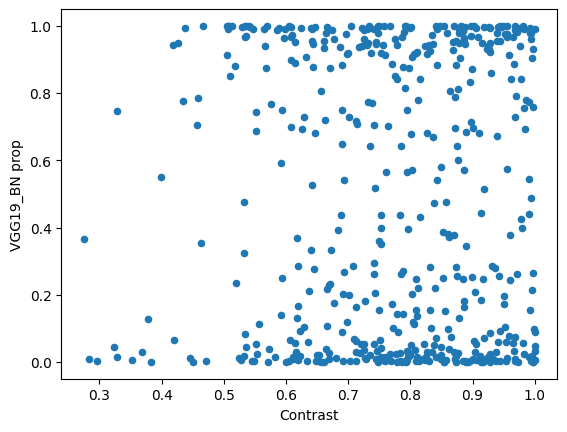

In [303]:
result.plot(kind = 'scatter', x = 'Contrast', y = 'VGG19_BN prop')

In [289]:
true_small = result[(result['Area'] < 1500) & (result['AlexNet bool'] == True)].shape[0]
true_big = result[(result['Area'] > 1500) & (result['AlexNet bool'] == True)].shape[0]
false_small = result[(result['Area'] < 1500) & (result['AlexNet bool'] == False)].shape[0]
false_big = result[(result['Area'] > 1500) & (result['AlexNet bool'] == False)].shape[0]

In [275]:
true_small = result[(result['Area'] < 1500) & (result['ResNet152 bool'] == True)].shape[0]
true_big = result[(result['Area'] > 1500) & (result['ResNet152 bool'] == True)].shape[0]
false_small = result[(result['Area'] < 1500) & (result['ResNet152 bool'] == False)].shape[0]
false_big = result[(result['Area'] > 1500) & (result['ResNet152 bool'] == False)].shape[0]

In [279]:
true_small = result[(result['Area'] < 1500) & (result['VGG19_BN bool'] == True)].shape[0]
true_big = result[(result['Area'] > 1500) & (result['VGG19_BN bool'] == True)].shape[0]
false_small = result[(result['Area'] < 1500) & (result['VGG19_BN bool'] == False)].shape[0]
false_big = result[(result['Area'] > 1500) & (result['VGG19_BN bool'] == False)].shape[0]

In [308]:
true_small = result[(result['Contrast'] < 0.5) & (result['AlexNet bool'] == True)].shape[0]
true_big = result[(result['Contrast'] > 0.5) & (result['AlexNet bool'] == True)].shape[0]
false_small = result[(result['Contrast'] < 0.5) & (result['AlexNet bool'] == False)].shape[0]
false_big = result[(result['Contrast'] > 0.5) & (result['AlexNet bool'] == False)].shape[0]

In [311]:
true_small = result[(result['Contrast'] < 0.5) & (result['ResNet152 bool'] == True)].shape[0]
true_big = result[(result['Contrast'] > 0.5) & (result['ResNet152 bool'] == True)].shape[0]
false_small = result[(result['Contrast'] < 0.5) & (result['ResNet152 bool'] == False)].shape[0]
false_big = result[(result['Contrast'] > 0.5) & (result['ResNet152 bool'] == False)].shape[0]

In [314]:
true_small = result[(result['Contrast'] < 0.5) & (result['VGG19_BN bool'] == True)].shape[0]
true_big = result[(result['Contrast'] > 0.5) & (result['VGG19_BN bool'] == True)].shape[0]
false_small = result[(result['Contrast'] < 0.5) & (result['VGG19_BN bool'] == False)].shape[0]
false_big = result[(result['Contrast'] > 0.5) & (result['VGG19_BN bool'] == False)].shape[0]

In [315]:
true_small/(false_small + true_small)

0.43478260869565216

In [316]:
true_big/(false_big + true_big)

0.5765199161425576

In [296]:
result[result['Area'] < 1500]['AlexNet prop'].mean()

0.47457217495511306

In [297]:
result[result['Area'] > 1500]['AlexNet prop'].mean()

0.4993508873619765

In [299]:
result[result['Area'] < 1500]['ResNet152 prop'].mean()

0.6278602098000404

In [300]:
result[result['Area'] > 1500]['ResNet152 prop'].mean()

0.6279761789821972

In [188]:
result.to_csv('csv/stats.csv')